<a href="https://colab.research.google.com/github/H-Romanini/PortifoliosPython/blob/master/Relat%C3%B3rioDeresultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automação do Fechamento de Mercado
---

Nesse notebook, desenvolvo um código que acompanha os ativos que invisto e gera um relatório, que é enviado por email. Dessa forma consigo gerir meu patrimonio e minha tomada de decisão sem despender um grande tempo diário.

Este notebook é de autoria de: Henrique Romanini

O uso desse notebook é livre e sua distribuição é permitida, apenas peço que dê os créditos deixando o link da publicação original ou uma breve citação de meu nome. Obrigado.

---



Instalando as bibliotecas não default:

In [ ]:
!pip install yfinance

Agora vamos importar todas que usaremos:

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


Nesse exemplo usarei 4 índices dolar, euro, bovespa e     S&P500

In [ ]:
tickers = [ "USDBRL=X", "EURBRL=X", "^BVSP", "^GSPC"]
data = yf.download(tickers = tickers, period = "6mo")["Adj Close"]
data = data.dropna()
data.columns = ["Dolar", "Euro", "Bovespa", "S&P500"]
data


[*********************100%***********************]  4 of 4 completed


,Dolar,Euro,Bovespa,S&P500
Date,,,,
2024-03-11 00:00:00+00:00,5.3716,4.97754,126124.0,5117.939941
2024-03-12 00:00:00+00:00,5.4348,4.97740,127668.0,5175.270020
2024-03-13 00:00:00+00:00,5.4304,4.96870,128006.0,5165.310059
2024-03-14 00:00:00+00:00,5.4423,4.96920,127690.0,5150.479980
2024-03-15 00:00:00+00:00,5.4277,4.99270,126742.0,5117.089844
...,...,...,...,...
2024-08-30 00:00:00+00:00,6.2224,5.62770,136004.0,5648.399902
2024-09-03 00:00:00+00:00,6.2134,5.61510,134353.0,5528.930176
2024-09-04 00:00:00+00:00,6.2275,5.64750,136111.0,5520.069824


Plotando os gráficos:

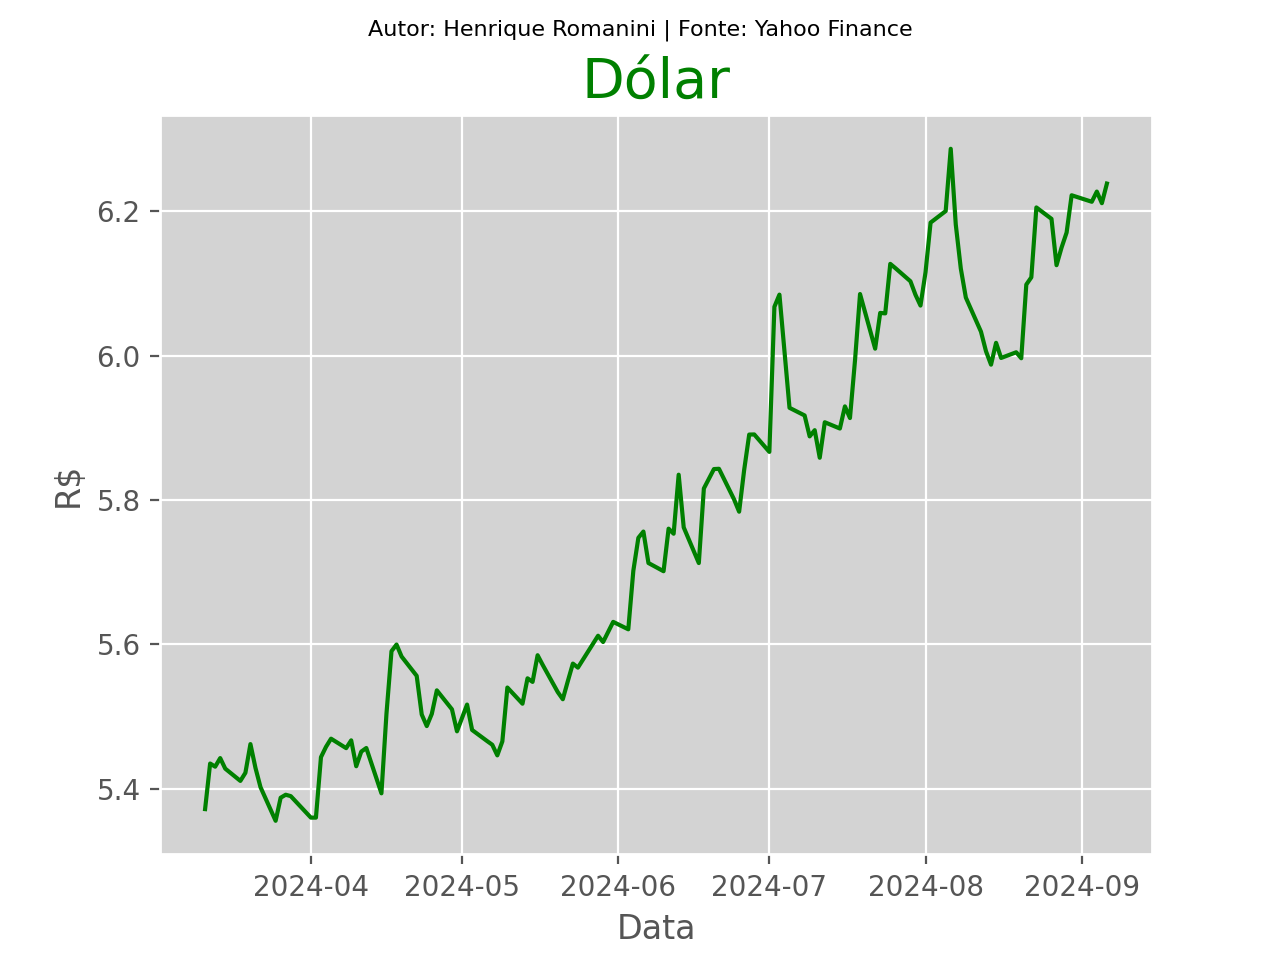

In [ ]:
# Criar a figura e os eixos
fig, ax = plt.subplots()

# Alterar a cor de fundo dos eixos
ax.set_facecolor('lightgray')  # Cor de fundo dos eixos

# Alterar a cor de fundo da figura
fig.patch.set_facecolor('white')  # Cor de fundo da figura

# Plotar os dados
ax.plot(data['Dolar'], color='Green')

# Remover a grade
ax.grid(True)

fig.suptitle("Autor: Henrique Romanini | Fonte: Yahoo Finance", fontsize=8)


# Plotar os dados
ax.set_title('Dólar', color='green', fontsize=20)
ax.set_xlabel('Data')
ax.set_ylabel('R$')

# Mostrar o gráfico
plt.show()







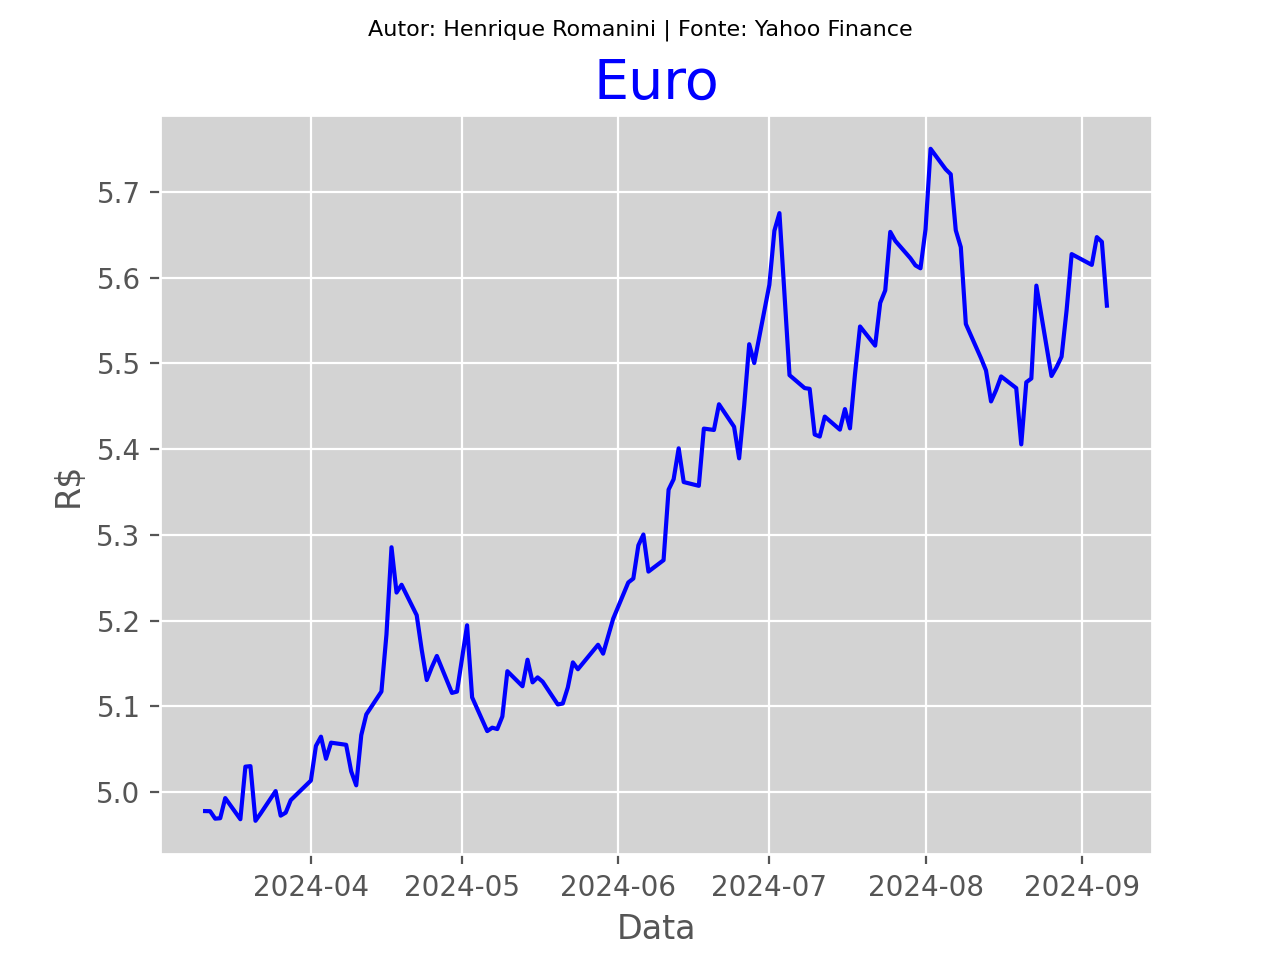

In [ ]:
# Criar a figura e os eixos
fig, ax = plt.subplots()

# Alterar a cor de fundo dos eixos
ax.set_facecolor('lightgray')  # Cor de fundo dos eixos

# Alterar a cor de fundo da figura
fig.patch.set_facecolor('white')  # Cor de fundo da figura

# Plotar os dados
ax.plot(data['Euro'], color='Blue')

# Remover a grade
ax.grid(True)

fig.suptitle("Autor: Henrique Romanini | Fonte: Yahoo Finance", fontsize=8)



# Adicionar título e rótulos dos eixos
ax.set_title('Euro', color='blue', fontsize=20)
ax.set_xlabel('Data')
ax.set_ylabel('R$')

# Mostrar o gráfico
plt.show()


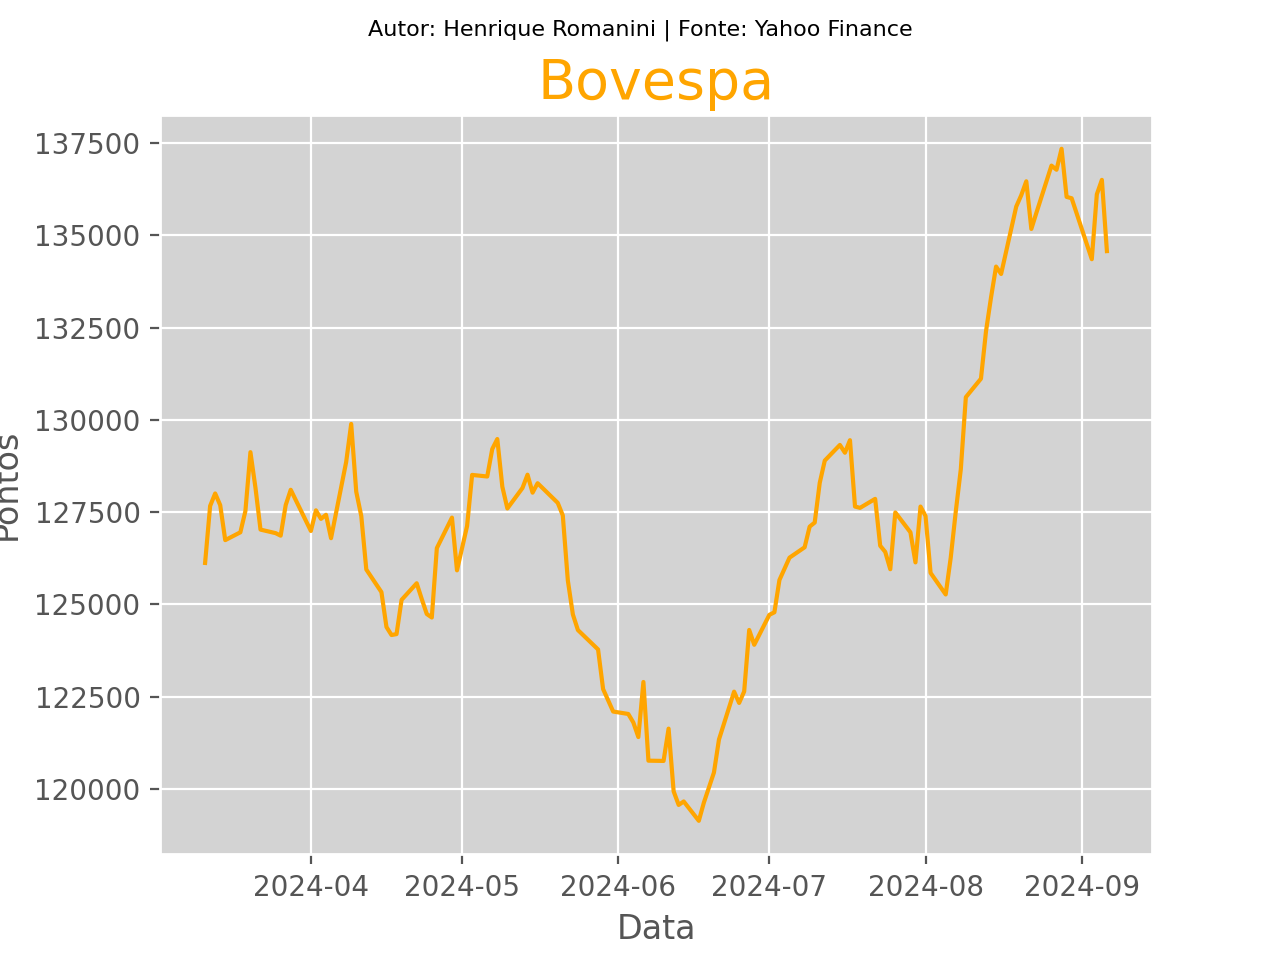

In [ ]:
# Criar a figura e os eixos
fig, ax = plt.subplots()

# Alterar a cor de fundo dos eixos
ax.set_facecolor('lightgray')  # Cor de fundo dos eixos

# Alterar a cor de fundo da figura
fig.patch.set_facecolor('white')  # Cor de fundo da figura

# Plotar os dados
ax.plot(data['Bovespa'], color='orange')

# Remover a grade
ax.grid(True)

fig.suptitle("Autor: Henrique Romanini | Fonte: Yahoo Finance", fontsize=8)

# Plotar os dados
ax.set_title('Bovespa', color='orange', fontsize=20)
ax.set_xlabel('Data')
ax.set_ylabel('Pontos')

# Mostrar o gráfico
plt.show()


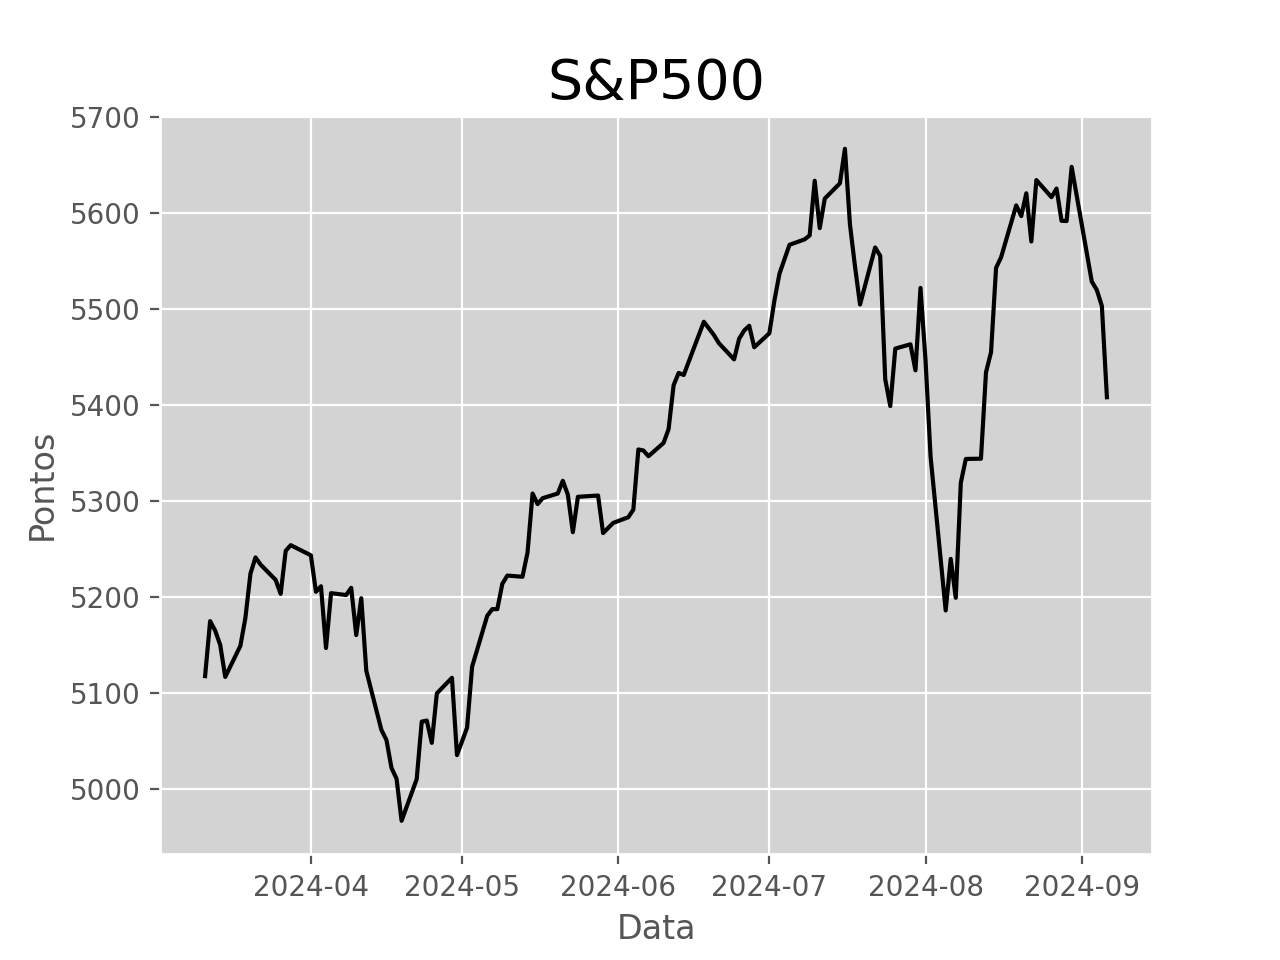

Text(0.5, 0.98, 'Autor: Henrique Romanini | Fonte: Yahoo Finance')

In [ ]:
# Criar a figura e os eixos
fig, ax = plt.subplots()

# Alterar a cor de fundo dos eixos
ax.set_facecolor('lightgray')  # Cor de fundo dos eixos

# Alterar a cor de fundo da figura
fig.patch.set_facecolor('white')  # Cor de fundo da figura

# Plotar os dados
ax.plot(data['S&P500'], color='Black')

# Remover a grade
ax.grid(True)

# Plotar os dados
ax.set_title('S&P500', color='Black', fontsize=20)
ax.set_xlabel('Data')
ax.set_ylabel('Pontos')

# Mostrar o gráfico
plt.show()

fig.suptitle("Autor: Henrique Romanini | Fonte: Yahoo Finance", fontsize=8)

Agora automatizaremos o envio de um email com esses gráficos:

Preparando o envio:

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import os

In [ ]:
# Ajustar layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste para considerar espaço para o subtítulo

# Salvar o gráfico como imagem
image_path = 'grafico.png'
plt.savefig(image_path, bbox_inches='tight')



In [ ]:
# Configurar o e-mail
from_email = 'seu_email@example.com'
to_email = 'destinatario@example.com'
subject = 'Relatório dos main Indices Economicos'
body = 'Gráfico em anexo. Obrigado'
password = 'sua_senha'

# Criar a mensagem de e-mail
msg = MIMEMultipart()
msg['From'] = from_email
msg['To'] = to_email
msg['Subject'] = subject

# Anexar o corpo do e-mail
msg.attach(MIMEText(body, 'plain'))

# Anexar o gráfico
attachment = open(image_path, 'rb')
part = MIMEBase('application', 'octet-stream')
part.set_payload(attachment.read())
encoders.encode_base64(part)
part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(image_path)}')
msg.attach(part)
attachment.close()

# Enviar o e-mail
server = smtplib.SMTP('smtp.example.com', 587)  # Substitua pelo servidor SMTP correto
server.starttls()
server.login(from_email, password)
server.send_message(msg)
server.quit()

# Remover o arquivo de imagem após o envio
os.remove(image_path)